In [1]:
# File created by rydhslmy at 2022/11/30 09:00 AM.
# Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.
# Purpose : Act as comparison for the Deep Q-Network models that is to be created.

In [2]:
# ---------- Import Libraries ---------- #
import os
import random
import math
from IPython.display import SVG
import numpy as np

# Import Custom libraries
from lib import qLearning as ql
from lib import support as fn
from lib import mazeSVG

File 'maze_config' exist in 'D:\PME_ITB\softwares\RL_Sim'
8 maze cofing file(s) detected.
1) 22083010X10c4.txt
2) 22100605X05c0.txt
3) 22100605X05c1.txt
4) 22100605X05c2.txt
5) 22100605X05c3.txt
6) 22100605X05c4.txt
7) 22113040X40c0.txt
8) 22113040X40c1.txt

Input Select Index (1-8) : 2

Selected '22100605X05c0.txt'
Loading 22100605X05c0.txt...
	File consists of 53 lines of data.
	Maze size loaded. 5X5 (25 states)
	Number of action loaded. There are 4 actions
	Next State list loaded.
	Current Reward list loaded.
Finish loading 22100605X05c0.txt
Add initial layout square


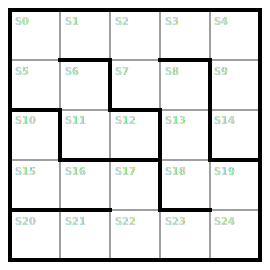

In [3]:
# ---------- Load Maze Config ---------- #
## Target maze config file
config_file = 'maze_config'
current_dir = os.getcwd()
config_path = fn.gen_path(current_dir, config_file)

## Select maze config file
mazeConfig_file = fn.select_maze(config_path)


## Read maze config file
maze_config = fn.load_mazeConfig(config_path, mazeConfig_file)

## Pass content of maze_config
maze_x = maze_config[0]
maze_y = maze_config[1]
total_state = maze_config[2]
total_act = maze_config[3]
ns_list = maze_config[4]
rt_list = maze_config[5]

## Display Maze
scale = 50*maze_x
blank_maze = 'current_maze.svg'
mSVG = mazeSVG.drawMaze(maze_x, maze_y, scale, ns_list)
mSVG.gen_svg(blank_maze)
display(SVG(blank_maze))

In [4]:
# Select goal state randomly from possible candidates
possible_goals = fn.find_goals(ns_list)
goal_state = random.choice(possible_goals)
# goal_state = 3
print(possible_goals)
print(goal_state)

[10, 12, 14, 20]
14


In [5]:
# Set Goal State Reward
goal_reward = 10

# Update Reward Matrix
if (goal_state > (total_state-1)):
    print("Goal State cannot be used. Try again")
else:
    for i in range(total_state):
        for j in range(total_act):
            if (ns_list[i][j]==goal_state)&(i != goal_state):
                rt_list[i][j] = goal_reward
    print('Current Reward list updated.')

Current Reward list updated.


In [6]:
# Set simulation's hyparameters
total_episode = 1000
max_step = 10*total_state
alpha = 0.125 # Learning Rate
gamma = 0.875 # Discount Factor
epsilon = 0.99

In [7]:
# Brute force learning

# Initialize Software Model
sw = ql.qrl(total_state = total_state,
            total_action = total_act,
            learning_rate = alpha, 
            discount_factor = gamma,
            initial_exploration_rate = epsilon,
            max_episode = total_episode,
            max_step = max_step,
            goal_state = goal_state,
            reward_matrix = rt_list,
            ns_matrix = ns_list,
            random_pool = possible_goals
           )

notFinished = True
while(notFinished):
    # Start software learning
    %time sw.start()
    
    # Check convergence
    pass_count = 0
    failed_start = []
    for start_state in possible_goals:
        if (start_state != goal_state):
            isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=True)
            if (isPass):
                pass_count += 1
            else:
                failed_start.append(start_state)
    print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')
    if (pass_count==len(possible_goals)-1):
        notFinished = False
    else:
        print(failed_start)
        total_episode += 1000
    print()
    notFinished = False

Start Q-learning...
Progress:[====================================================================================================] (100/100)Execution time = 0.4019620418548584s
Finished learning for 1000 episode(s)
Wall time: 403 ms
Goal reached count: 3/3



Shortest Path from S010 to S014.
Agent requires 16 step to reach  S014 from S010
Add initial layout square


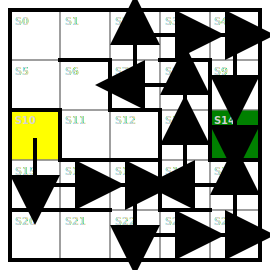

Shortest Path from S012 to S014.
Agent requires 10 step to reach  S014 from S012
Add initial layout square


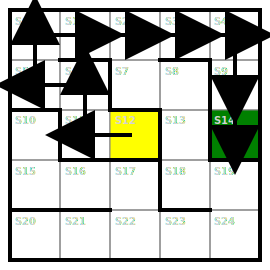

Shortest Path from S020 to S014.
Agent requires 14 step to reach  S014 from S020
Add initial layout square


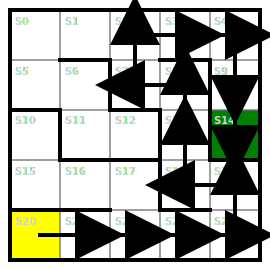

Goal reached count: 3/3


In [8]:
pass_count = 0

for start_state in possible_goals:
    if (start_state != goal_state):
        isPass, record = sw.shortest_path(start=start_state, show_step=False, quiet=False)
        if (isPass):
            pass_count += 1
        msp_file = 'shortest_path.svg'
        mSVG.gen_svg(msp_file, path=record)
        display(SVG(msp_file))

print(f'Goal reached count: {pass_count}/{len(possible_goals)-1}')

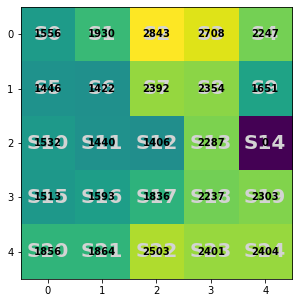

In [9]:
svc = sw.state_visit_count.reshape((maze_x, maze_y))
fn.vis_svc(svc)

In [10]:
svc.shape

(5, 5)

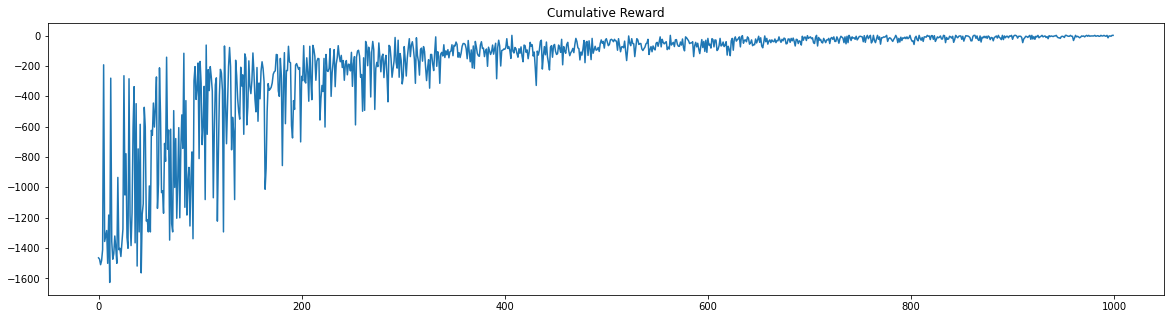

In [11]:
fn.plot(sw.cumulative_rewards, title='Cumulative Reward')

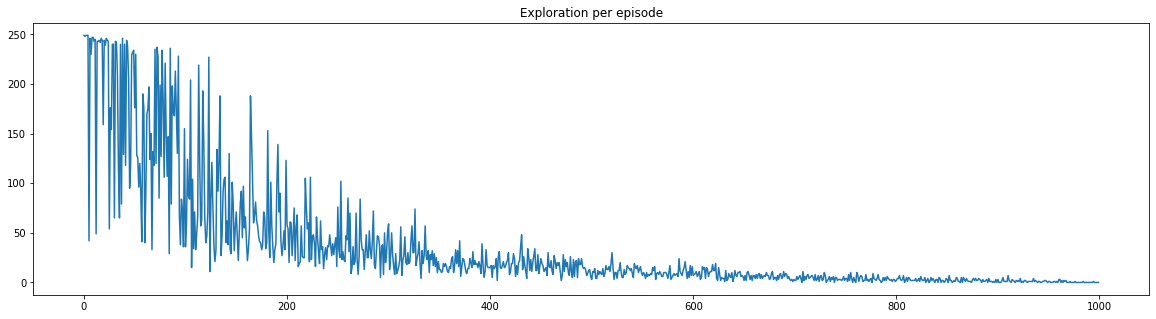

In [12]:
fn.plot(sw.exploration_per_episode, title='Exploration per episode')

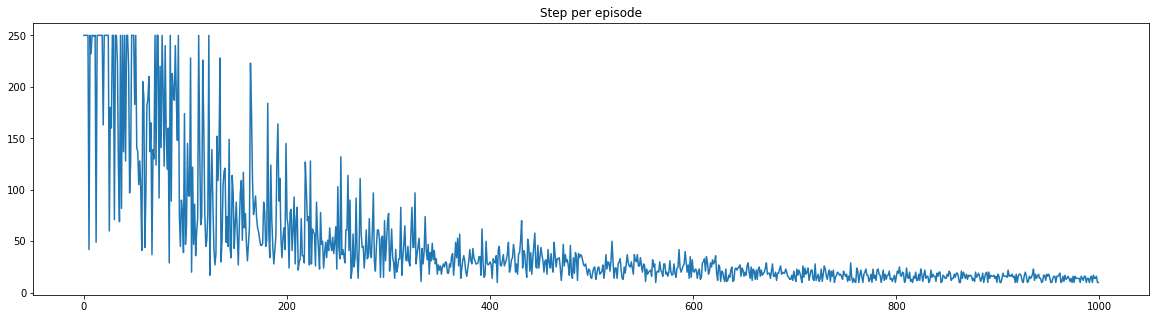

In [13]:
fn.plot(sw.step_per_episode, title='Step per episode')

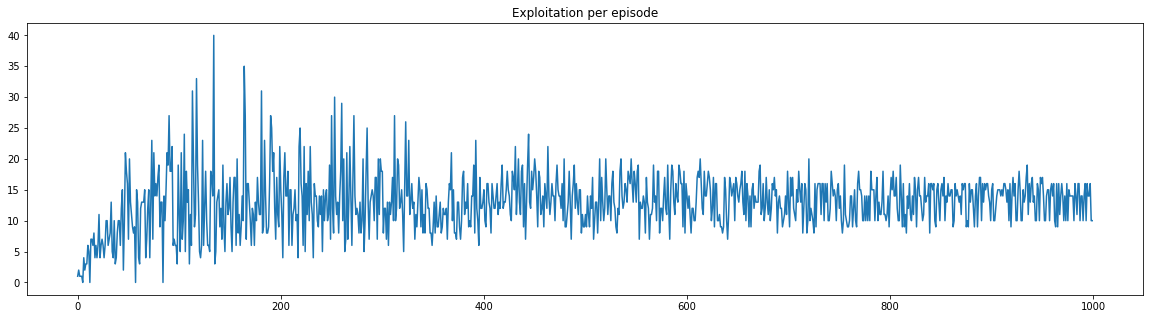

In [14]:
array1 = np.array(sw.step_per_episode)
array2 = np.array(sw.exploration_per_episode)
subtracted_array = np.subtract(array1, array2)
exploit = list(subtracted_array)

fn.plot(exploit, title='Exploitation per episode')

In [15]:
fn.display_qTable(sw.Q, gen_file=True, show=False)